# Calculo Multidimensional Parte 3
## Longitud de una curva (arc length)
Como explicamos a mano alzada, la longitud de arco esta dada por

$$ s = \int_a^b \sqrt{\dot{x}^2 + \dot{y}^2} dt  .$$
donde
$\dot{x}= dx/dt$, y lo mismo $\dot{y}=dy/dt$.

Si fuese 3D`

$$ s = \int_a^b \sqrt{\dot{x}^2 + \dot{y}^2 + \dot{z}} dt  .$$

Veamos un ejemplo.

Tomemos el espiral de la clase anterior.


$$h(t) = \begin{pmatrix} a \sin t \\ b \cos t \\ c t \end{pmatrix} .$$

Entramos que la  integral es

$$\int h(t) dt = \begin{pmatrix} -a \cos t \\ b \sin t \\ ct^2/2 \end{pmatrix} .$$

In [ ]:
import sympy as sp
from sympy import symbols, Matrix, integrate
t = symbols('t', real=True)
a,b,c = symbols(' a b c', constant=True)
r = Matrix( [a*sp.sin(t), b*sp.cos(t), c*t])
r

Matrix([
[a*sin(t)],
[b*cos(t)],
[     c*t]])

In [ ]:
# como se integra una funcion vectorial
integrate(r,t)

Matrix([
[-a*cos(t)],
[ b*sin(t)],
[ c*t**2/2]])

### Actividad #1

La longitud de arco entre los parametros $t=p$, $t=q$ esta dada por la ecuacion

$$s= \int_p^q \sqrt{\dot{x}^2 + \dot{y}^2 + \dot{z}^2} dt .$$
Halle la longitud de archo de la helice (helix) entre $t=0$ y $t=4$, con  $a=b=c=1$ (circular). Que pasa si $a \ne b$?
por ejemplo $a=1$, $b=2$. Halle un valor analitico y numerico.

### Curvatura de una curva
Dada una curva $r=r(t)$.


$$ \kappa = \frac{\| \dot{T}\|}{\| \dot{r} \| } \tag{1}.$$
$\| \dot{r} \| $ es la rapidez

Veamos un ejemplo. Tomemos la curva espiral llamada Golden Spiral


$$((\sin t) \varphi^{t/\pi}, (\cos t) \varphi^{t/\pi}) .$$

Repaso, recuerde que $T=\frac{\dot{r}}{\| \dot{r} \|} $

In [ ]:
from sympy import GoldenRatio
varphi = GoldenRatio
varphi.evalf()

1.61803398874989

In [ ]:
from sympy import Rational, diff
t = symbols('t', real=True)

r = Matrix ( [sp.sin(t)*varphi**(t/sp.pi), sp.cos(t)*varphi**(t/sp.pi)])
r

Matrix([
[GoldenRatio**(t/pi)*sin(t)],
[GoldenRatio**(t/pi)*cos(t)]])

In [ ]:
v = diff(r,t) # r puntico es la velocidad
speed = sp.sqrt(v.dot(v)) # otra forma v.norm()
display(v, speed)

Matrix([
[ GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t)],
[-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi]])

sqrt((-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)**2 + (GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t))**2)

In [ ]:
# se pude simplicar?
speedSim =speed.simplify()
speedSim

GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2)/pi

In [ ]:
T = v/speedSim
DTdt = diff(T,t)
DTdtn = DTdt.norm()
kappa = DTdtn/speedSim
kappa

pi*sqrt((-(-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)*log(GoldenRatio)/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2)) + pi*(-2*GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi - GoldenRatio**(t/pi)*cos(t) + GoldenRatio**(t/pi)*log(GoldenRatio)**2*cos(t)/pi**2)/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2)))**2 + ((GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t))*log(GoldenRatio)/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2)) - pi*(-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)**2*sin(t)/pi**2 + 2*GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2)))**2)/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2))

In [ ]:
# se puede simplicar?
kappaSim =kappa.simplify()
kappaSim

pi/(GoldenRatio**(t/pi)*sqrt(log(GoldenRatio)**2 + pi**2))

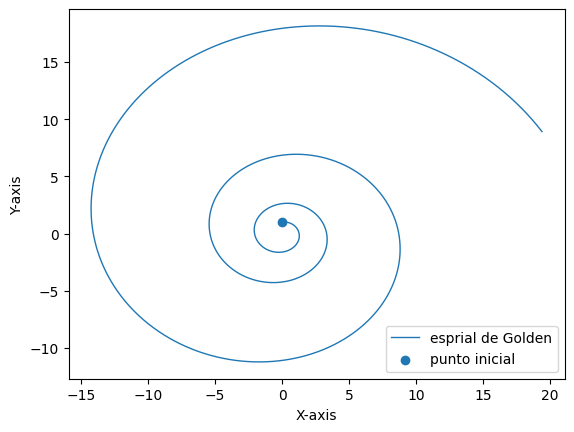

In [ ]:
# Graficar
import matplotlib.pyplot as plt
import numpy as np
from sympy import lambdify


# los ts
w = np.arange(0, 20, 0.01) # dominio
x = lambdify(t, r[0])
y = lambdify(t, r[1])

k = lambdify(t, kappaSim)

# etiquetas
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# el plot
plt.plot( x(w), y(w), label='esprial de Golden', linewidth=1)
plt.scatter( x(0), y(0), label='punto inicial', linewidth=1)
plt.legend()

plt.show()


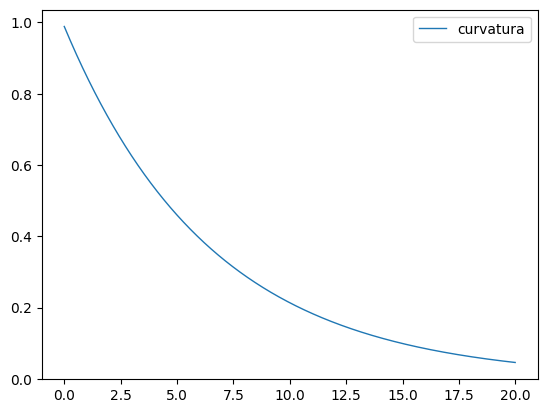

In [ ]:
# grafiquemos la curvatura
plt.plot( w, k(w), label="curvatura", linewidth=1)
plt.legend()
plt.show()

### Actividad #2
* Encuentre la longitud de arco en el espiral de Golden, analitica y numericamente.
* Encuentre la longitud de una circunferencia de radio $R$ usando
`SymPy`.

* Encuentre la curvatura de una circunferencia de radio $R$. Use la Ecuacion 1.


Hay 4 tipos de funciones en los reales

1.  Funciones reales $f: A \subset \mathbb{R} \to \mathbb{R} $. Calculo diferencial e integral

2.  Funciones vectoriales $f: A \subset \mathbb{R} \to \mathbb{R}^n $. Curvas, calculo multidimensional. Calculo vectorial. Curvas en el espacio. Las dos clases anteriores.


3.  Campos escalares $f: A \subset \mathbb{R}^m \to \mathbb{R} $.  Superficies, calculo multidimensional (III). Hoy.

4.
3.  Campos vectoriales $f: A \subset \mathbb{R}^m \to \mathbb{R}^n $.  Proxima clase.


Estudiamos los conceptos basicos

* Limite.
* Derivadas parciales.
* Derivadas direccionales.
* Gradiente.
* matriz Hessiana.
* Superficies y sus extremos (maximo, minimo, punto de silla, etc.

Desafortunadamente el limite multidimensional no esta bien implementado en `SymPy`. Lo discutimos ya.

Ejemplo.

$$\lim_{(x,y) \to (0,0)} \frac{x^2 y}{x^4 + y^2} .$$
y
$$\lim_{(x,y) \to (1,1)} \frac{x^2 y}{x^4 + y^2} .$$

El limite en (nD, $n>1$) existe  si es el mismo por cualquier camino que se llegue. En funciones de una variable solo hay izquierda y derecha. Pero en funciones de mas de una variable hay muchos caminos.

Por ejemplo dos trayectorias para este limite.

* La linea $(t,t)$ de 45 grados
Es decir $x=t,y=t$

$$\lim_{(t,t) \to (0,0)} \frac{t^2 t}{t^4 + t^2}  = \lim_{t \to 0}\frac{t^3}{t^4  + t^2} = \lim_{t \to 0} \frac{t}{t^2+1} = 0 .$$

* Otra linea, una linea parabolica $(t,t^2)$

$$\lim_{(x,y) \to (0,0)} \frac{t^2 t^2}{t^4 + t^4} = \lim_{t \to 0} \frac{t^4}{t^4 + y^2} = \lim_{t \to 0} \frac{1}{2} = \frac12 .$$


De forma que no da lo mismo el limite aproximandose por una linea de 45 grados que por una parabola. El limite no existe.


[WolframAlpha](https://www.wolframalpha.com/input?i=limit_%7B%28x%2Cy%29+to+%280%2C0%29+%7D+++%28x%5E2+++y%29+%2F%28x%5E4+%2B+y%5E2%29) dice que el limite **no** existe.

Veamos que hace `SymPy`




In [ ]:
from sympy import symbols, limit

# definimos variables
x, y = symbols('x y')

# definimos funcion
f = (x**2 * y)/(x**4 + y**2)
display(f)

x**2*y/(x**4 + y**2)

In [ ]:
# calculamos limite
limit_value = f.limit(x,0).limit(y,0)
limit_value

0

Pero el limite no existe. Puede tratar con Symbolab, o con Maxima o otra software de su conveniencia.

[Caso mio en StackOverflow](https://stackoverflow.com/questions/78367097/sympy-yields-a-limit-0-for-an-expression-whose-limit-does-not-exist) sobre este problema.

El problema es que `SymPy` lo calcula **iterado** no simultaneo. Entonces cuando calcula el primero.

In [ ]:
# cuando el limite existe no hay problemas.
limit_value= f.limit(x,1).limit(y,1)
limit_value

1/2

### Actividad #3
Muestre que el limite de $f$ no existe considereando los caminos $y=k(x-2) +1$. Muestre por lo menos dos valores del limite.
Ayuda. Programe una funcion de `k`,

ejemplo
```
def myLin=f(x,k):
```

Si para dos valores de $k$ distintos es diferente, el limite no existe.

### Derivadas parciales y gradiente.

Por ejemplo $f(x,y) = x^2 - \cos(x + 2y) $

$$\frac{\partial f}{\partial x} = 2x + \sin(x + 2 y) .$$
y similar con $\partial f/\partial y$.

In [ ]:
import sympy as sp
from sympy import cos, diff
f = x**2 - sp.cos(x+ 2*y)
diff(f,x)

2*x + sin(x + 2*y)

In [ ]:
diff(f,y)

2*sin(x + 2*y)

Mas complicada


$$ \frac{\partial^7 f}{\partial^3 x \partial^4 y} .$$

In [ ]:
# una mas complicada
diff(f, x,3, y, 4)

-16*sin(x + 2*y)

### Gradiente.
Tres metodos para hallar el gradiente.

1. Metodo 1.

In [ ]:
from sympy.vector import CoordSys3D, gradient # sistema coordenado i,j,k
C = CoordSys3D('')
x,y,z = symbols('x y  z')
f = C.x*sp.sin(C.y)*C.z**2
f

.x*.z**2*sin(.y)

In [ ]:
gradf = gradient(f)
gradf

(.z**2*sin(.y))*.i + (.x*.z**2*cos(.y))*.j + (2*.x*.z*sin(.y))*.k

In [ ]:
gradfM = gradient(f).to_matrix(C)
gradfM

Matrix([
[   .z**2*sin(.y)],
[.x*.z**2*cos(.y)],
[ 2*.x*.z*sin(.y)]])

In [ ]:
# evalumamos
gradfMeval = gradient(f).to_matrix(C).subs( { C.x:1, C.y:sp.pi/2, C.z:2})
gradfMeval

Matrix([
[4],
[0],
[4]])

2. Metodo 2

In [ ]:
from sympy import ordered, Matrix
f = x*sp.sin(y)*z**2
display(f)

# v el vector ordenado de variables
v = list( ordered(f.free_symbols))
display(v)

x*z**2*sin(y)

[x, y, z]

In [ ]:
# definimos el gradiente como
gradient = Matrix (  [diff(f,var) for var in v])
gradient

Matrix([
[  z**2*sin(y)],
[x*z**2*cos(y)],
[ 2*x*z*sin(y)]])

In [ ]:
gradient = Matrix (  [diff(f,var) for var in v]).subs( {x:1, y:sp.pi/2, z:2})
gradient

Matrix([
[4],
[0],
[4]])

3. Metodo 3.
Usamos la matriz Jacobiana

In [ ]:
x,y,z = symbols('x y z')
f = x*sp.sin(y)*z**2
v = list(ordered(f.free_symbols))
display(v)
Df = Matrix([f]).jacobian(v)
Df

[x, y, z]

Matrix([[z**2*sin(y), x*z**2*cos(y), 2*x*z*sin(y)]])

In [ ]:
Df.subs( [(x,1), (y, sp.pi/2), (z,2)])

Matrix([[4, 0, 4]])


## Proxima clase
- [x] Limite.
- [x] Derivadas parciales.
- [x] Gradiente.
- Derivadas direccionales.
- Reglas de la cadena
* matriz Hessiana.
* Superficies y sus extremos (maximo, minimo, punto de silla, etc.
